In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('ICRISAT-District Level Data - ICRISAT-District Level Data.csv')
df.head(5)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('[^a-z0-9_]','', regex=True)

1. Top 7 RICE PRODUCTION State Data(Bar_plot)

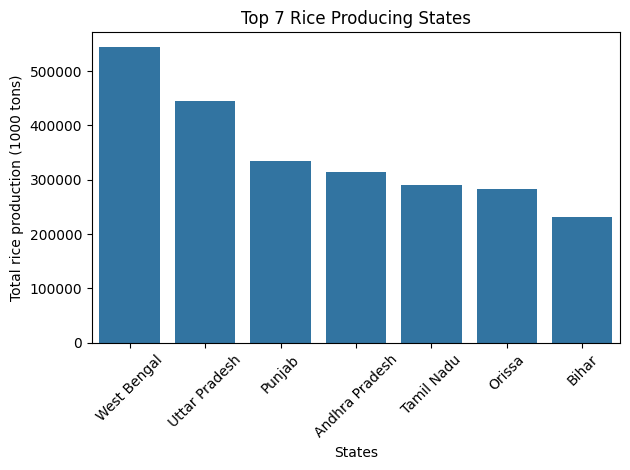

In [4]:

# Grouping and sorting
total_rice_production = df.groupby('state_name')['rice_production_1000_tons'].sum().reset_index()
top_7_states = total_rice_production.sort_values(by='rice_production_1000_tons', ascending=False).head(7)


sns.barplot(data=top_7_states,
            x='state_name', y='rice_production_1000_tons')

plt.xlabel("States")
plt.ylabel("Total rice production (1000 tons)")
plt.title("Top 7 Rice Producing States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)

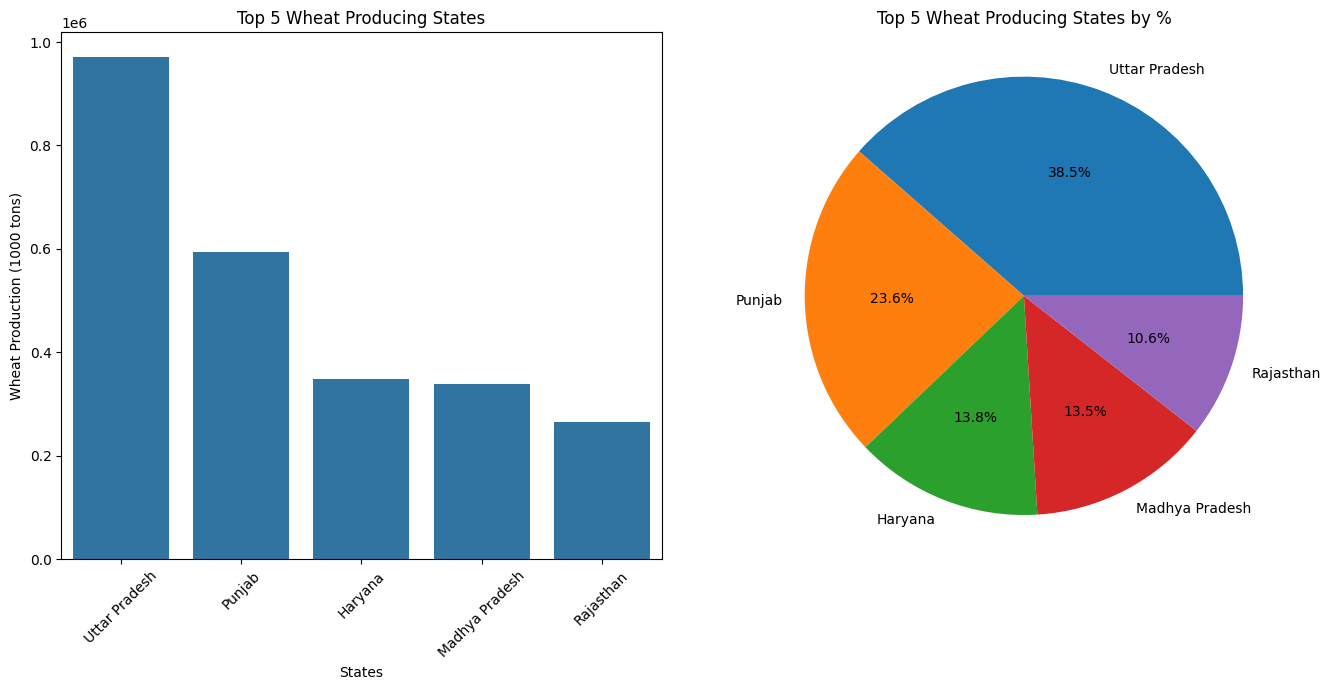

In [5]:
total_wheat_production = df.groupby('state_name')['wheat_production_1000_tons'].sum().reset_index()
top_5_states = total_wheat_production.sort_values(by='wheat_production_1000_tons', ascending=False).head(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Barplot
sns.barplot(data=top_5_states,
            x='state_name', y='wheat_production_1000_tons', ax=axes[0])
axes[0].set_title("Top 5 Wheat Producing States")
axes[0].set_xlabel("States")
axes[0].set_ylabel("Wheat Production (1000 tons)")
axes[0].tick_params(axis='x', rotation=45)  # Corrected this line

# Pie chart
labels = top_5_states['state_name']
values = top_5_states['wheat_production_1000_tons']
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Top 5 Wheat Producing States by %")
axes[1].axis('equal')  # To make the pie chart circular

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


3. Oil seed production by top 5 states

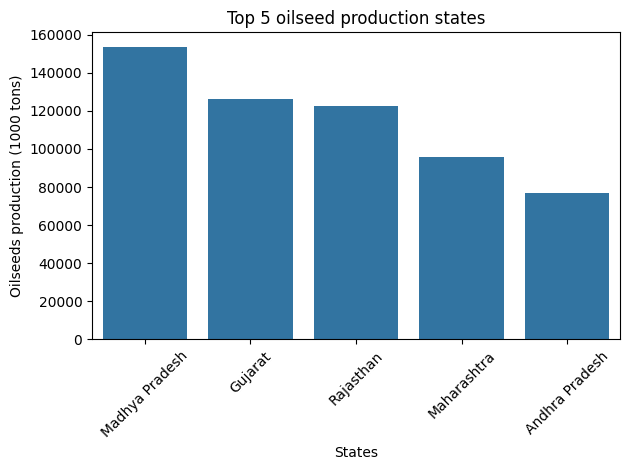

In [6]:
total_oilseed_production = df.groupby('state_name')['oilseeds_production_1000_tons'].sum().reset_index()
top_5_states = total_oilseed_production.sort_values(by= 'oilseeds_production_1000_tons', ascending=False).head(5)

#barplot
sns.barplot(data=top_5_states,
            x='state_name',
            y= 'oilseeds_production_1000_tons')
plt.xlabel("States")
plt.ylabel("Oilseeds production (1000 tons)")
plt.title("Top 5 oilseed production states")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

4.Top 7 SUNFLOWER PRODUCTION  State

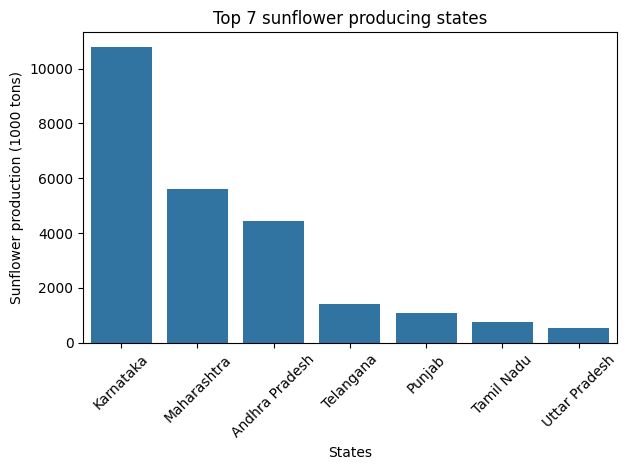

In [7]:
total_sunflower_production = df.groupby('state_name')['sunflower_production_1000_tons'].sum().reset_index()

top_7_states = total_sunflower_production.sort_values(by='sunflower_production_1000_tons', ascending=False).head(7)

#barplot
sns.barplot(data= top_7_states,
            x='state_name',
            y='sunflower_production_1000_tons')
plt.xlabel("States")
plt.ylabel("Sunflower production (1000 tons)")
plt.title("Top 7 sunflower producing states")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

5. India's SUGARCANE PRODUCTION From Last 50 years(Line_plot)

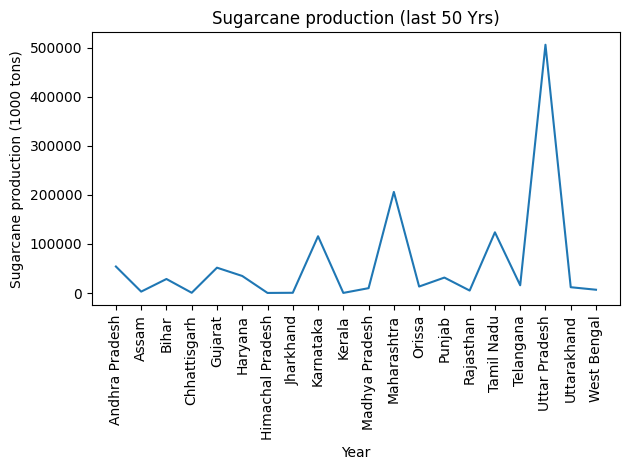

In [8]:
sugarcane_production = df.groupby('state_name')['sugarcane_production_1000_tons'].sum().reset_index()

#lineplot
sns.lineplot(data=sugarcane_production,
             x='state_name',
             y='sugarcane_production_1000_tons')
plt.xlabel("Year")
plt.ylabel("Sugarcane production (1000 tons)")
plt.title("Sugarcane production (last 50 Yrs)")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

6. Rice Production Vs Wheat Production (Last 50y)

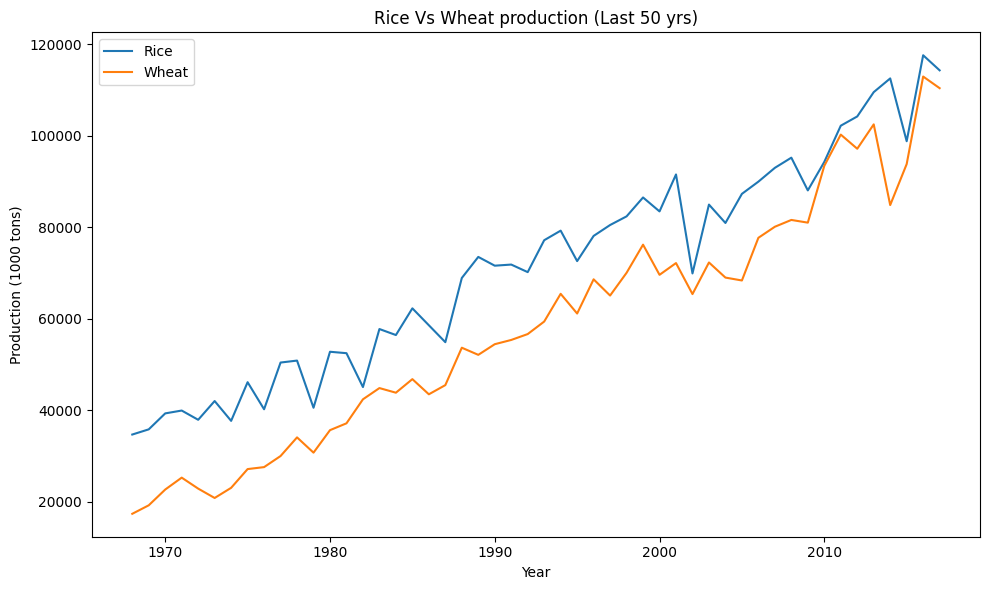

In [9]:
rice_production = df.groupby('year')['rice_production_1000_tons'].sum().reset_index().sort_values('year').tail(50)

wheat_production = df.groupby('year')['wheat_production_1000_tons'].sum().reset_index().sort_values('year').tail(50)

#merging both datasets on year

production = pd.merge(rice_production, wheat_production, on='year')

#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=production, x='year', y='rice_production_1000_tons', label = 'Rice')
sns.lineplot(data=production, x='year', y='wheat_production_1000_tons', label= 'Wheat')

plt.xlabel('Year')
plt.ylabel('Production (1000 tons)')
plt.title("Rice Vs Wheat production (Last 50 yrs)")
plt.legend()
plt.tight_layout()
plt.show()

7. Rice Production By West Bengal Districts

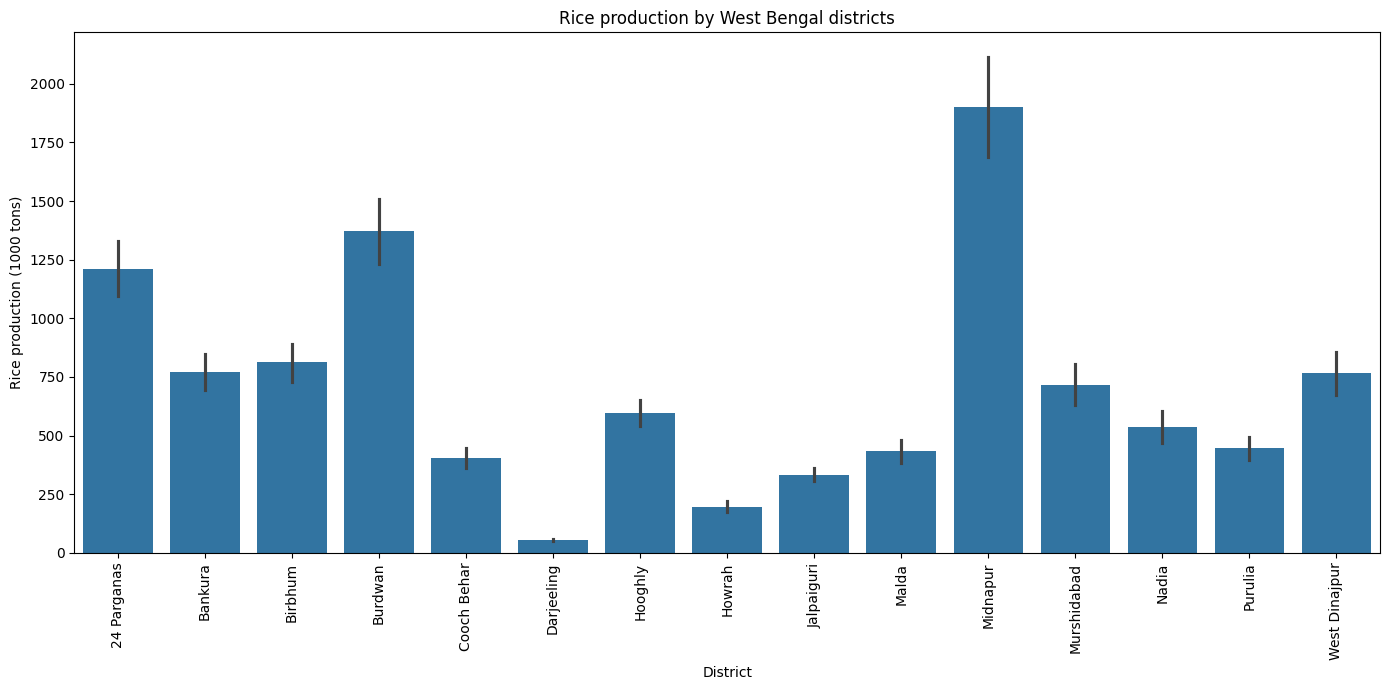

In [10]:
#filter for westbengal
rice_wb = df[df['state_name'].str.lower() == 'west bengal']

rice_production_wbd = rice_wb.groupby(['dist_name', 'year'])['rice_production_1000_tons'].sum().reset_index()

#barplot
plt.figure(figsize= (14,7))
sns.barplot(data= rice_production_wbd,
            x='dist_name',
            y='rice_production_1000_tons')
plt.xlabel("District")
plt.ylabel("Rice production (1000 tons)")
plt.title("Rice production by West Bengal districts")
plt.xticks(rotation= 90, fontsize=10)
plt.tight_layout()
plt.show()

8. Top 10 Wheat Production Years From UP

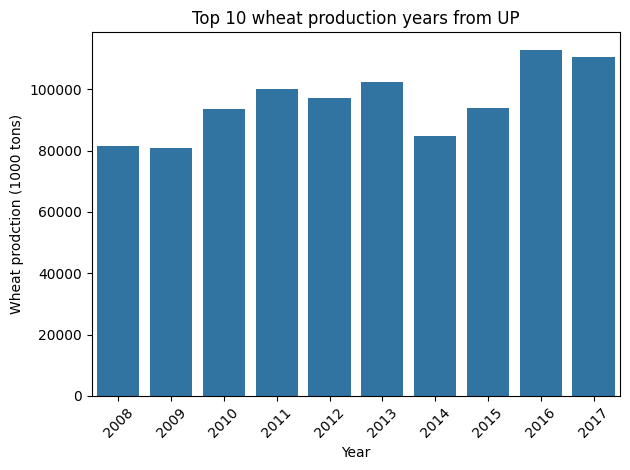

In [11]:
wheat_production_up = df.groupby('year')['wheat_production_1000_tons'].sum().reset_index()
top_10_yrs = wheat_production_up.sort_values(by='wheat_production_1000_tons', ascending=False).head(10)

#barplot
sns.barplot(data=top_10_yrs,
            x='year',
            y='wheat_production_1000_tons')
plt.xlabel("Year")
plt.ylabel("Wheat prodction (1000 tons)")
plt.title("Top 10 wheat production years from UP")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Millet Production (Last 50y)

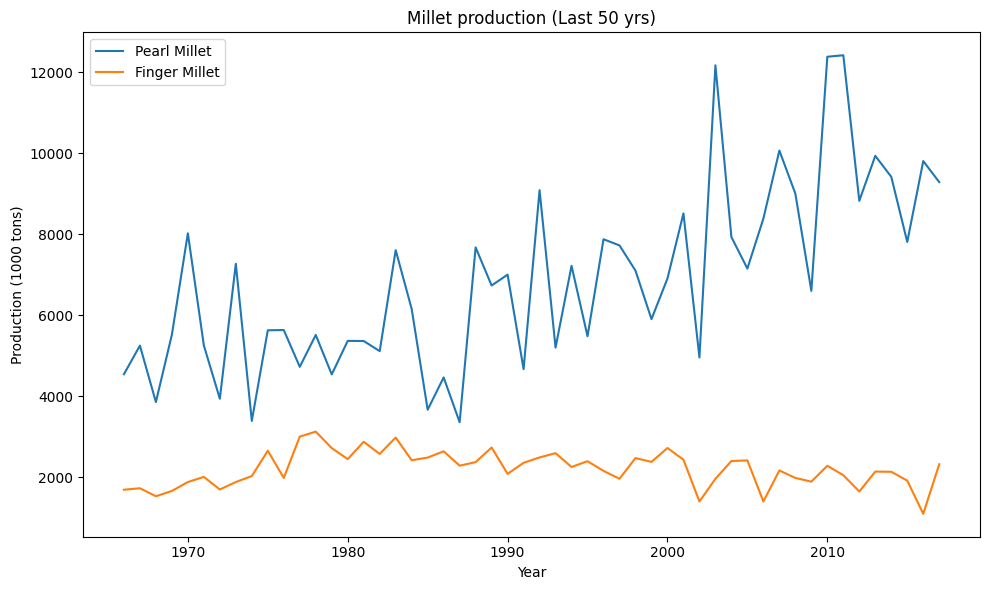

In [12]:
pearl_millet_production = df.groupby('year')['pearl_millet_production_1000_tons'].sum().reset_index()
finger_millet_production = df.groupby('year')['finger_millet_production_1000_tons'].sum().reset_index()

#merge both datasets on year

millet_production = pd.merge(pearl_millet_production, finger_millet_production, on='year')

#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=millet_production, x='year', y='pearl_millet_production_1000_tons', label = 'Pearl Millet')
sns.lineplot(data=millet_production, x='year', y='finger_millet_production_1000_tons', label= 'Finger Millet')

plt.xlabel('Year')
plt.ylabel('Production (1000 tons)')
plt.title("Millet production (Last 50 yrs)")
plt.legend()
plt.tight_layout()
plt.show()


10. Sorghum Production (Kharif and Rabi) by Region

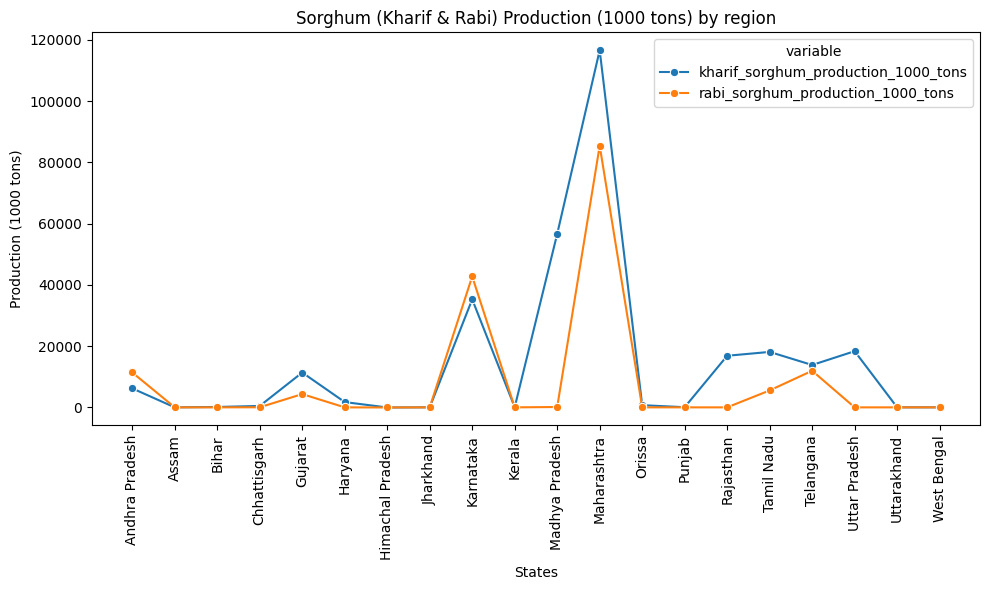

In [13]:
kharif_production = df.groupby('state_name')['kharif_sorghum_production_1000_tons'].sum().reset_index()
rabi_production = df.groupby('state_name')['rabi_sorghum_production_1000_tons'].sum().reset_index()

#merge the datasets on state name
sorghum_production = pd.merge(kharif_production, rabi_production, on='state_name')

#lineplot
plt.figure(figsize=(10,6))

sns.lineplot(data=sorghum_production.melt(id_vars='state_name'), 
             x='state_name', y='value', hue='variable', marker='o')

plt.xlabel('States')
plt.ylabel('Production (1000 tons)')
plt.title("Sorghum (Kharif & Rabi) Production (1000 tons) by region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


11. Top 7 States for Groundnut Production

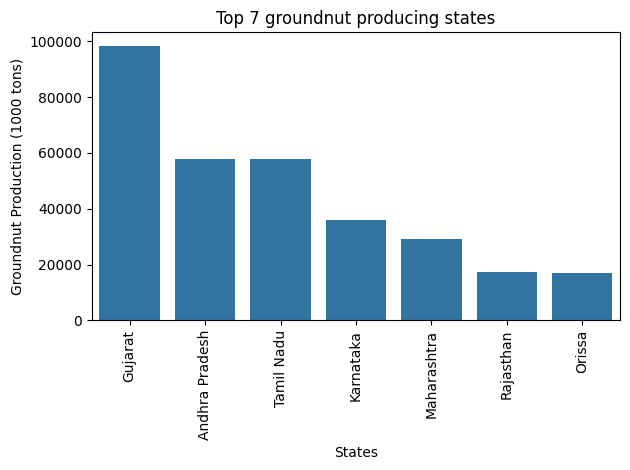

In [14]:
groundnut_production = df.groupby('state_name')['groundnut_production_1000_tons'].sum().reset_index()
top_7 = groundnut_production.sort_values(by='groundnut_production_1000_tons', ascending=False).head(7)

#barplot
sns.barplot(data=top_7,
            x='state_name',
            y='groundnut_production_1000_tons')
plt.xlabel("States")
plt.ylabel("Groundnut Production (1000 tons)")
plt.title("Top 7 groundnut producing states")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


12. Soybean Production by Top 5 States and Yield Efficiency

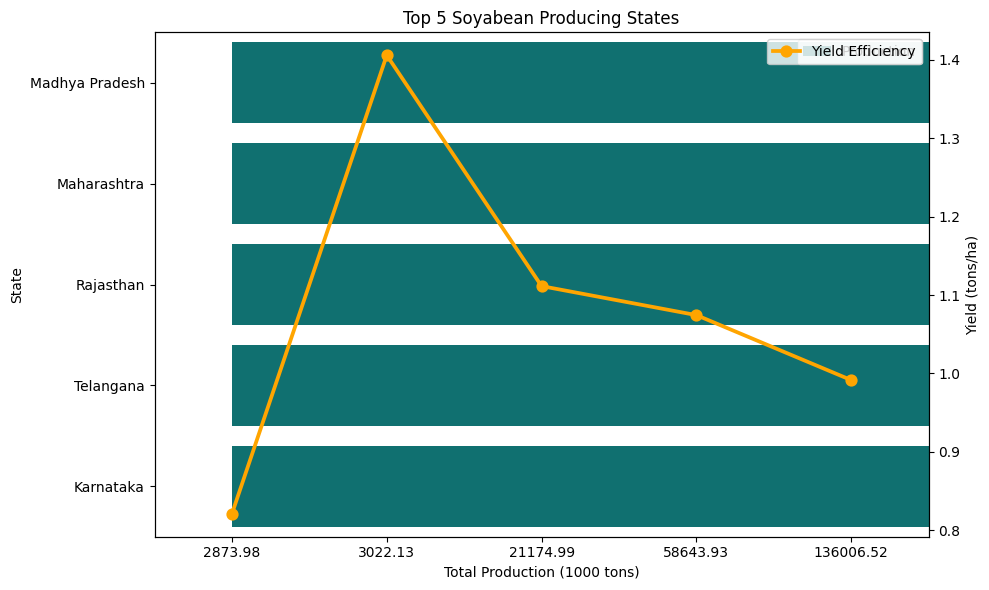

In [21]:


# Filter relevant columns
soy_data = df[["state_name", "soyabean_production_1000_tons", "soyabean_area_1000_ha"]]

#  Group by state and aggregate total production and area
state_summary = soy_data.groupby("state_name").agg({
    "soyabean_production_1000_tons": "sum",
    "soyabean_area_1000_ha": "sum"
}).reset_index()

# Calculate yield efficiency
state_summary["yield_efficiency"] = (
    state_summary["soyabean_production_1000_tons"] / state_summary["soyabean_area_1000_ha"]
)

# Sort by total production and select top 5 states
top5_states = state_summary.sort_values(by="soyabean_production_1000_tons", ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_states, x="soyabean_production_1000_tons", y="state_name", color="teal", label="Production")
plt.xlabel("Total Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 5 Soyabean Producing States")

# Plot yield on a second axis
ax2 = plt.gca().twinx()
sns.pointplot(data=top5_states, x="soyabean_production_1000_tons", y="yield_efficiency", 
              color="orange", label="Yield Efficiency", ax=ax2)
ax2.set_ylabel("Yield (tons/ha)")
plt.tight_layout()
plt.show()


13. Oilseed Production in Major States

C:\Users\ASHOK\AppData\Local\Temp\ipykernel_17596\2931380465.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_oilseeds.head(10), x="oilseeds_production_1000_tons", y="state_name", palette="viridis")


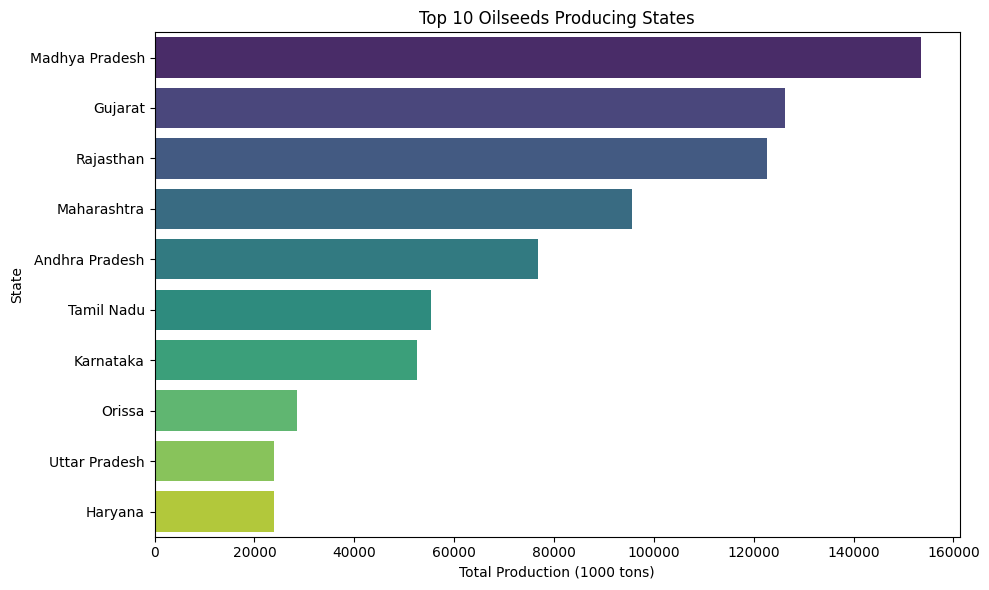

In [19]:
# Group by state and calculate total oilseeds production
state_oilseeds = df.groupby("state_name")["oilseeds_production_1000_tons"].sum().reset_index()

# Sort states by production (descending)
state_oilseeds = state_oilseeds.sort_values(by="oilseeds_production_1000_tons", ascending=False)

# Optional: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_oilseeds.head(10), x="oilseeds_production_1000_tons", y="state_name", palette="viridis")
plt.title("Top 10 Oilseeds Producing States")
plt.xlabel("Total Production (1000 tons)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)


===== RICE =====
                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 3.202e+04
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        20:31:23   Log-Likelihood:                -99660.
No. Observations:               14976   AIC:                         1.993e+05
Df Residuals:                   14974   BIC:                         1.993e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3378      2.021  

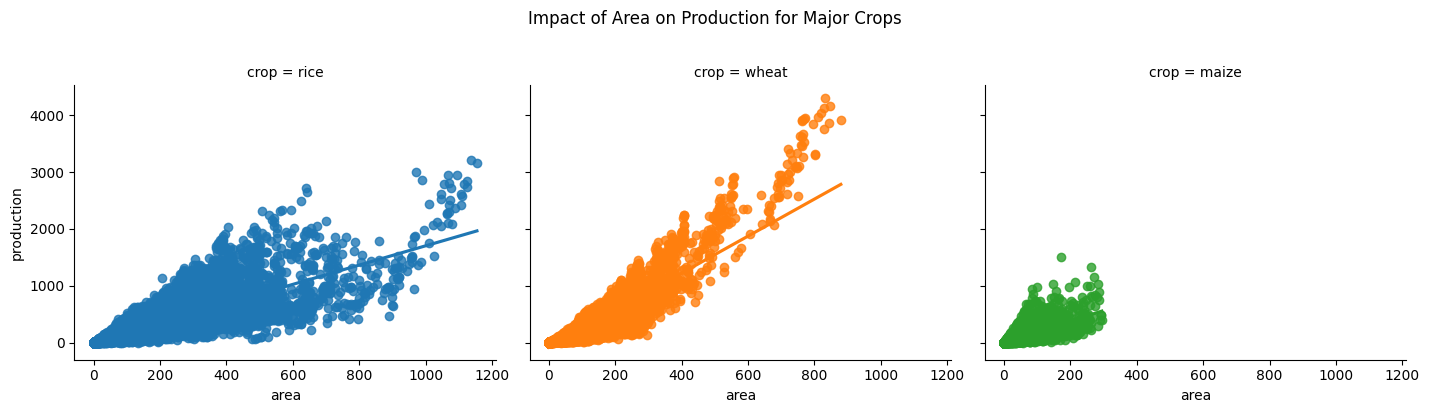

In [15]:

import statsmodels.api as sm

# Unpivot production data
unpivoted = pd.melt(
    df,
    id_vars=["dist_name", "year"],
    value_vars=[
        "rice_production_1000_tons",
        "wheat_production_1000_tons",
        "maize_production_1000_tons"
    ],
    var_name="crop",
    value_name="production"
)

# Normalize crop names in production
unpivoted["crop"] = unpivoted["crop"].str.extract(r"^(rice|wheat|maize)")

# Unpivot area data
area_unpivoted = pd.melt(
    df,
    id_vars=["dist_name", "year"],
    value_vars=[
        "rice_area_1000_ha",
        "wheat_area_1000_ha",
        "maize_area_1000_ha"
    ],
    var_name="crop_area",
    value_name="area"
)

# Normalize crop names in area
area_unpivoted["crop"] = area_unpivoted["crop_area"].str.extract(r"^(rice|wheat|maize)")

# Merge area and production
merged = pd.merge(
    unpivoted,
    area_unpivoted[["dist_name", "year", "crop", "area"]],
    on=["dist_name", "year", "crop"]
)

# Drop missing or zero values
merged = merged.dropna(subset=["area", "production"])
merged = merged[(merged["area"] > 0) & (merged["production"] > 0)]

# Run regression for each crop
results = {}
for crop in ["rice", "wheat", "maize"]:
    crop_data = merged[merged["crop"] == crop]
    if crop_data.empty:
        print(f"No data available for {crop}. Skipping...")
        continue
    X = sm.add_constant(crop_data["area"])  # Add intercept
    y = crop_data["production"]
    model = sm.OLS(y, X).fit()
    results[crop] = model
    print(f"\n===== {crop.upper()} =====")
    print(model.summary())

# Optional: Plot regression lines
sns.lmplot(
    data=merged,
    x="area",
    y="production",
    col="crop",
    hue="crop",
    height=4,
    aspect=1.2,
    markers='o',
    ci=None
)
plt.suptitle("Impact of Area on Production for Major Crops", y=1.02)
plt.tight_layout()
plt.show()


15. Rice vs. Wheat Yield Across States

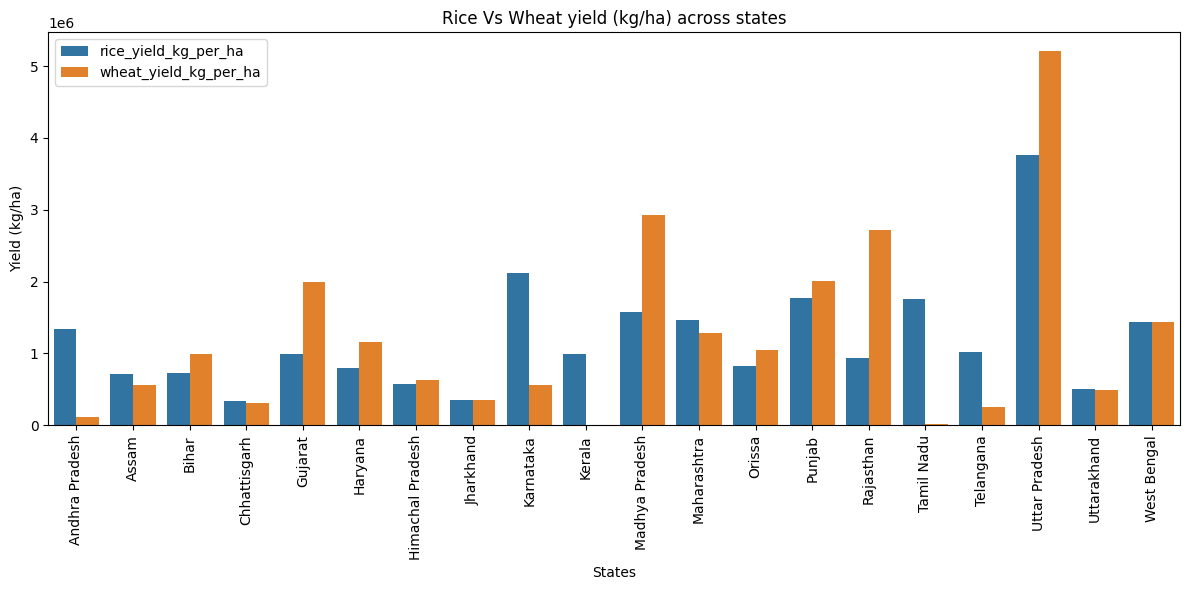

In [16]:
rice_yield = df.groupby('state_name')['rice_yield_kg_per_ha'].sum().reset_index()
wheat_yield = df.groupby('state_name')['wheat_yield_kg_per_ha'].sum().reset_index()

#merging both datasets on state name

crop_yield = pd.merge(rice_yield, wheat_yield, on='state_name')

melted_yield = crop_yield.melt(id_vars='state_name', value_vars=['rice_yield_kg_per_ha','wheat_yield_kg_per_ha'],
                               var_name='Crop', value_name='Yield')

#barplot
plt.figure(figsize=(12,6))
sns.barplot(data=melted_yield, x='state_name', y='Yield', hue='Crop')

plt.xlabel("States")
plt.ylabel("Yield (kg/ha)")
plt.title("Rice Vs Wheat yield (kg/ha) across states")
plt.legend()
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [17]:
df.to_csv('agridata.csv', index=False)